# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import functions
import importlib
importlib.reload(functions)

import warnings

# **Display**

In [2]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option('display.max_rows', 200)

size = 20

## **Colors**

In [3]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "indianred"
color_7 = "slategrey"
color_8 = "salmon"
color_9 = "beige"
color_10 = "coral"
color_11 = "grey"
color_12 = "tan"
color_13 = "wheat"
color_14 = "tomato"

In [4]:
size = 20
params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
    "figure.figsize": (10, 6),
}

# **Variables**

In [5]:
random_state = 101
target = 'TARGET'

# **Data**

In [6]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\application_train.csv",
    index_col=False
)


# test = pd.read_csv(
#     r"C:\Users\Dell\Documents\AI\Risk\Data\application_test.csv",
#     index_col=False
# )

In [45]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# **Data Cleaning**

## **Removing Empty Features**

In [7]:
list_columns = functions.check_columns_with_one_uniquevalue(test)
print(f"There are {len(list_columns)} columns with just 1 unique value")

There are 11 columns with just 1 unique value


In [9]:
train = train.drop(list_columns, axis = 1)

## **Reduce Memory Usage**

In [7]:
train = functions.reduce_memory_usage(train)

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


# **Exploratory Data Analysis**

## **Target Disbribution**

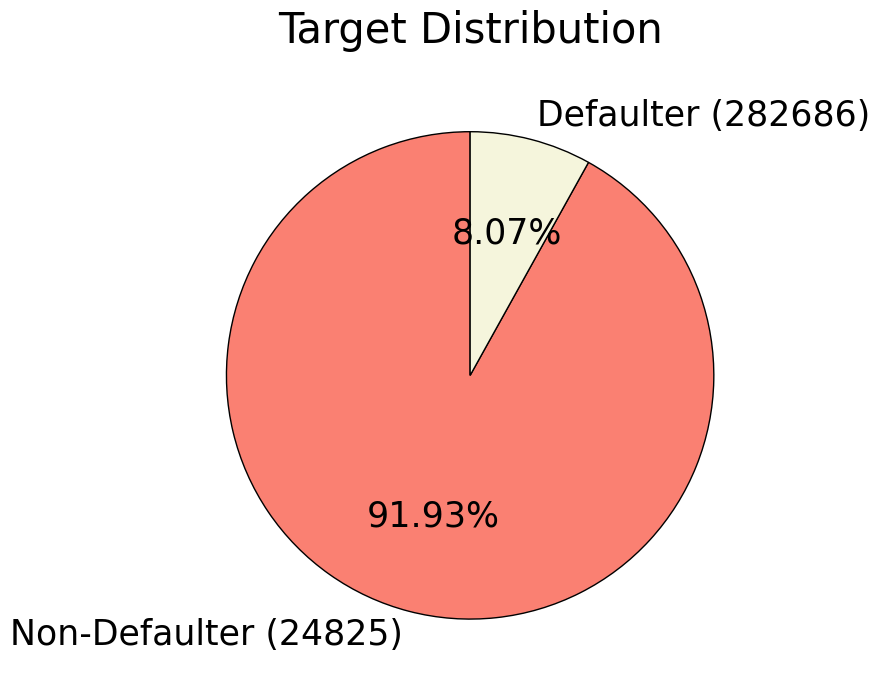

In [12]:
data = train[target].value_counts()
colors = [color_8, color_9]
labels = [f'Non-Defaulter ({data[1]})', f'Defaulter ({data[0]})']
title = "Target Distribution"

functions.piechart(data, title, colors, labels, size)

## **Missing Values**

In [64]:
functions.MissingValues(train)

,NumberMissing,PercentageMissing,DataType
COMMONAREA_MODE,214865,69.87,float64
COMMONAREA_MEDI,214865,69.87,float64
COMMONAREA_AVG,214865,69.87,float64
NONLIVINGAPARTMENTS_AVG,213514,69.43,float64
NONLIVINGAPARTMENTS_MODE,213514,69.43,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.43,float64
FONDKAPREMONT_MODE,210295,68.39,object
LIVINGAPARTMENTS_MODE,210199,68.35,float64
LIVINGAPARTMENTS_AVG,210199,68.35,float64
LIVINGAPARTMENTS_MEDI,210199,68.35,float64


## **Column Types**

In [65]:
train.dtypes.value_counts()

float64    66
int64      40
object     16
Name: count, dtype: int64

## **Unique Values in Categorical Columns**

In [68]:
functions.UniqueValues(train)

NAME_CONTRACT_TYPE: 2
CODE_GENDER: 3
FLAG_OWN_CAR: 2
FLAG_OWN_REALTY: 2
NAME_TYPE_SUITE: 7
NAME_INCOME_TYPE: 8
NAME_EDUCATION_TYPE: 5
NAME_FAMILY_STATUS: 6
NAME_HOUSING_TYPE: 6
OCCUPATION_TYPE: 18
WEEKDAY_APPR_PROCESS_START: 7
ORGANIZATION_TYPE: 58
FONDKAPREMONT_MODE: 4
HOUSETYPE_MODE: 3
WALLSMATERIAL_MODE: 7
EMERGENCYSTATE_MODE: 2


## **Age**

In [76]:
train["DAYS_BIRTH"] = abs(train["DAYS_BIRTH"])
train["DAYS_BIRTH"] = train["DAYS_BIRTH"]/365
train.rename(columns={'DAYS_BIRTH': 'Age'}, inplace=True)
train["Age"].describe()  

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: Age, dtype: float64

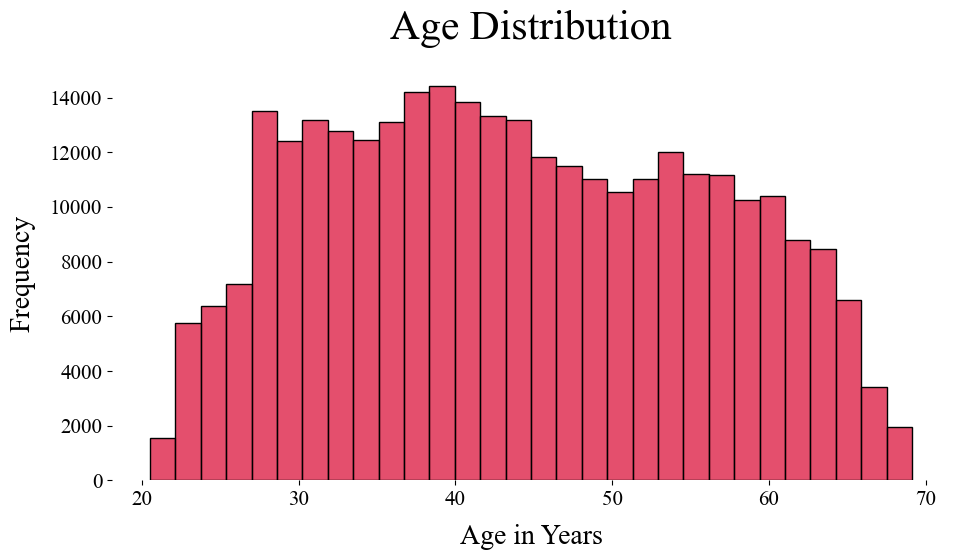

In [78]:
data = train
column = 'Age'
title = 'Age Distribution'
color = color_2
x_label = 'Age in Years'
y_label = 'Frequency'
bins = 30

functions.histplot(data, column, title, color, x_label, y_label, bins)

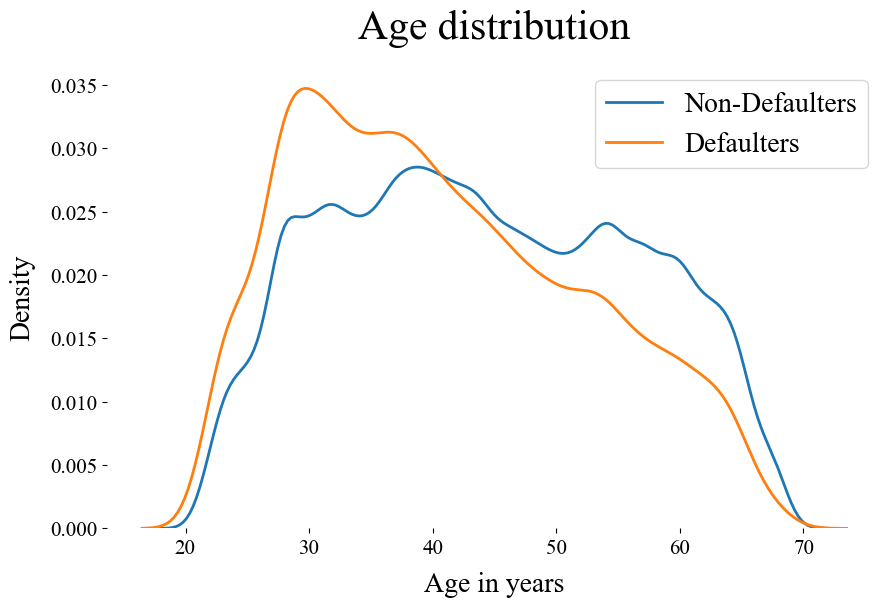

In [40]:
plt.figure(figsize=(10,6))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'Age'], label='Non-Defaulters')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'Age'], label='Defaulters')

plt.title('Age Distribution');
plt.xlabel('Age in Years');
plt.ylabel('Density');
plt.legend();

## **Gender**

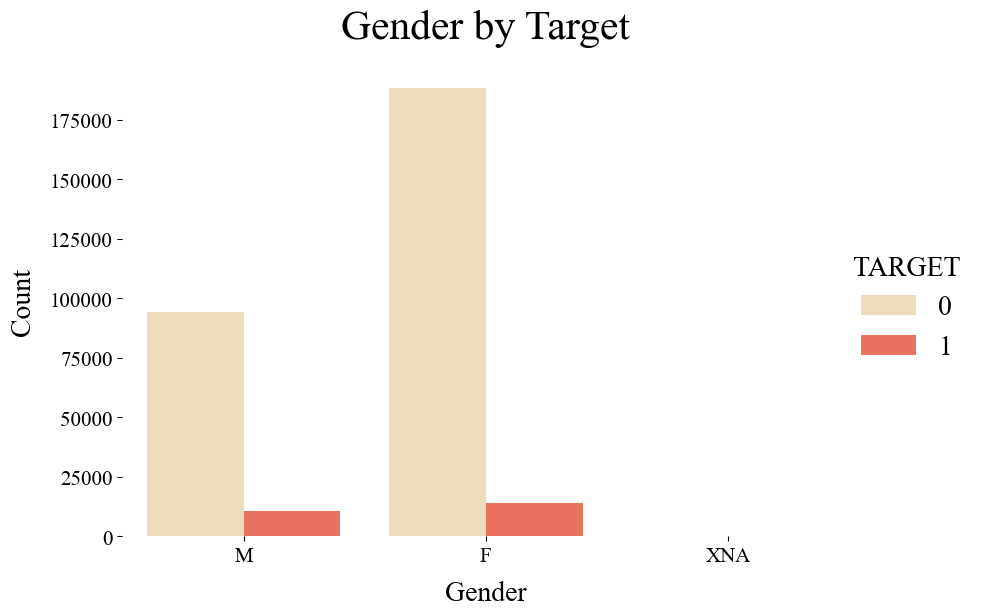

In [120]:
g = sns.catplot(data=train, x='CODE_GENDER', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Gender by Target')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

## **Years Employed**

In [8]:
train["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)
train["DAYS_EMPLOYED"] = abs(train["DAYS_EMPLOYED"])
train["DAYS_EMPLOYED"] = train["DAYS_EMPLOYED"]/365
train.rename(columns={"DAYS_EMPLOYED": 'YEARS_EMPLOYED'}, inplace=True)
train["YEARS_EMPLOYED"].describe()  

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

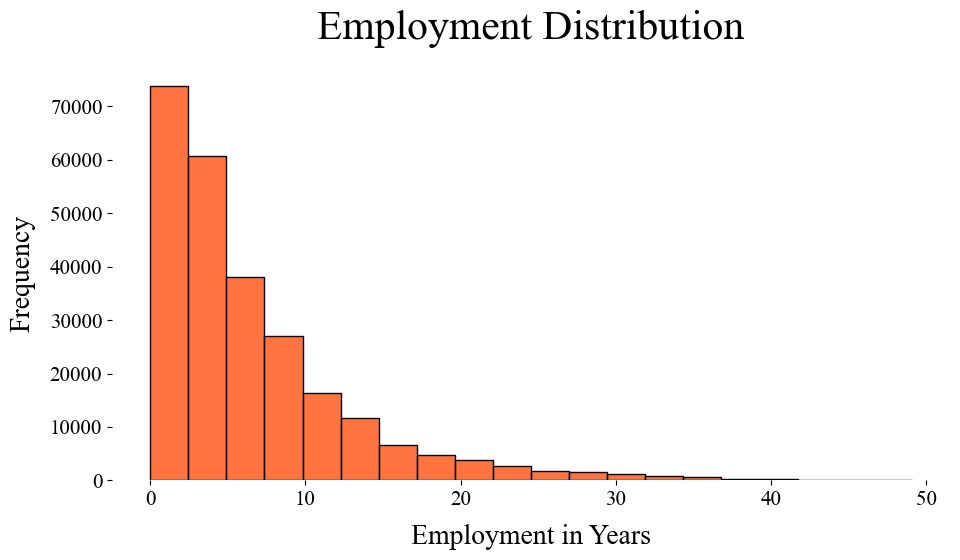

In [ ]:
data = train
column = 'YEARS_EMPLOYED'
title = 'Employment Distribution'
color = color_3
x_label = 'Employment in Years'
y_label = 'Frequency'
bins = 20

functions.histplot(data, column, title, color, x_label, y_label, bins)

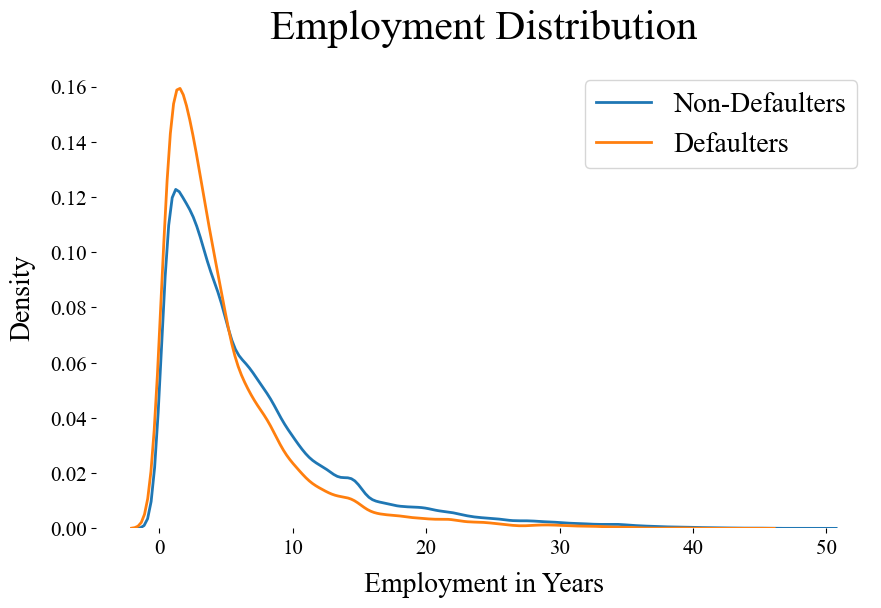

In [70]:
plt.figure(figsize=(10,6))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'YEARS_EMPLOYED'], label='Non-Defaulters')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'YEARS_EMPLOYED'], label='Defaulters')

plt.title('Employment Distribution');
plt.xlabel('Employment in Years');
plt.ylabel('Density');
plt.legend();

## **Family Status**

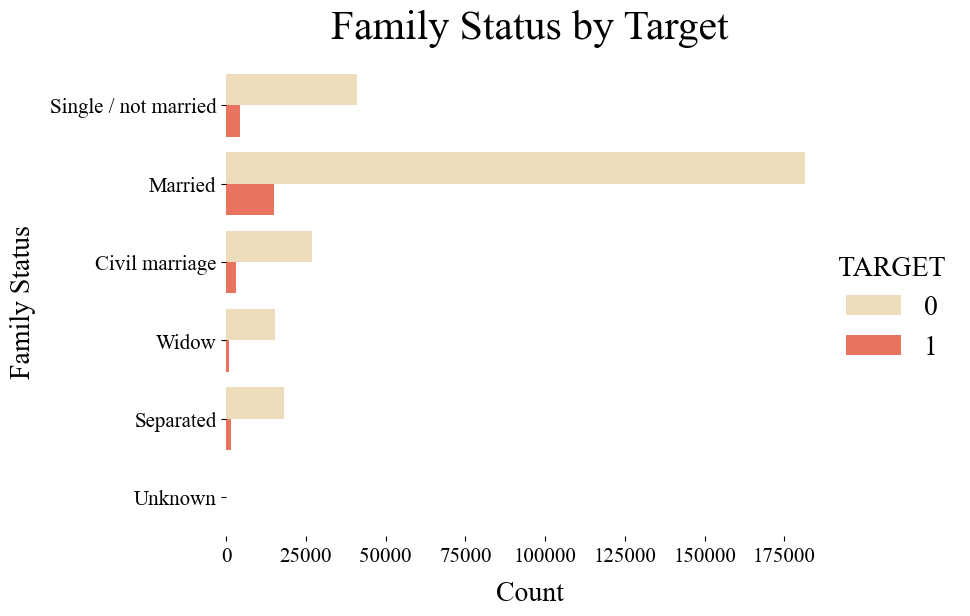

In [116]:
g = sns.catplot(data=train, y='NAME_FAMILY_STATUS', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Family Status by Target')
plt.xlabel('Count')
plt.ylabel('Family Status')

plt.show()

## **Number of Children**

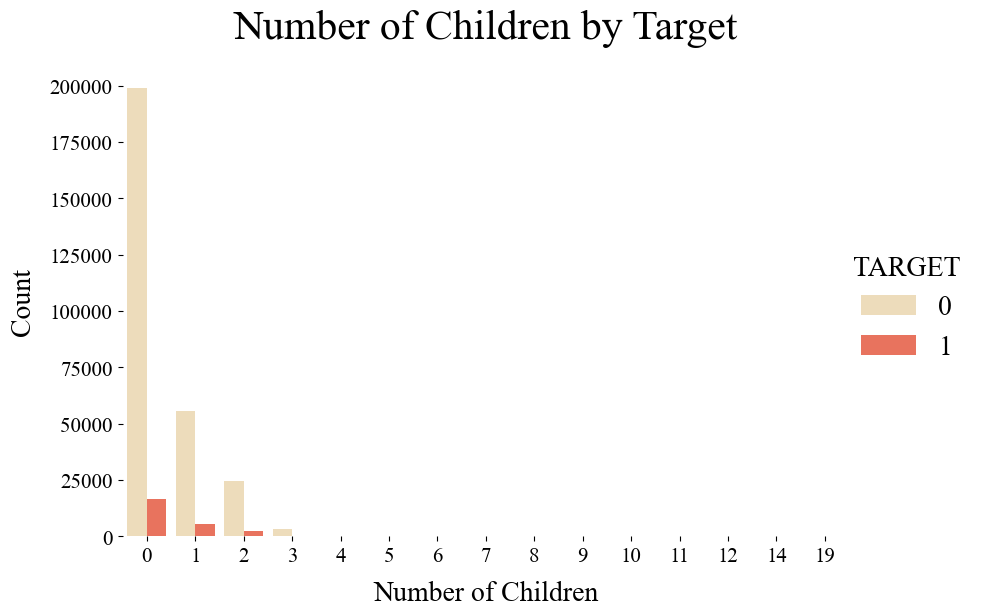

In [124]:
g = sns.catplot(data=train, x='CNT_CHILDREN', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Number of Children by Target')
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.show()

# **Cars Ownership**

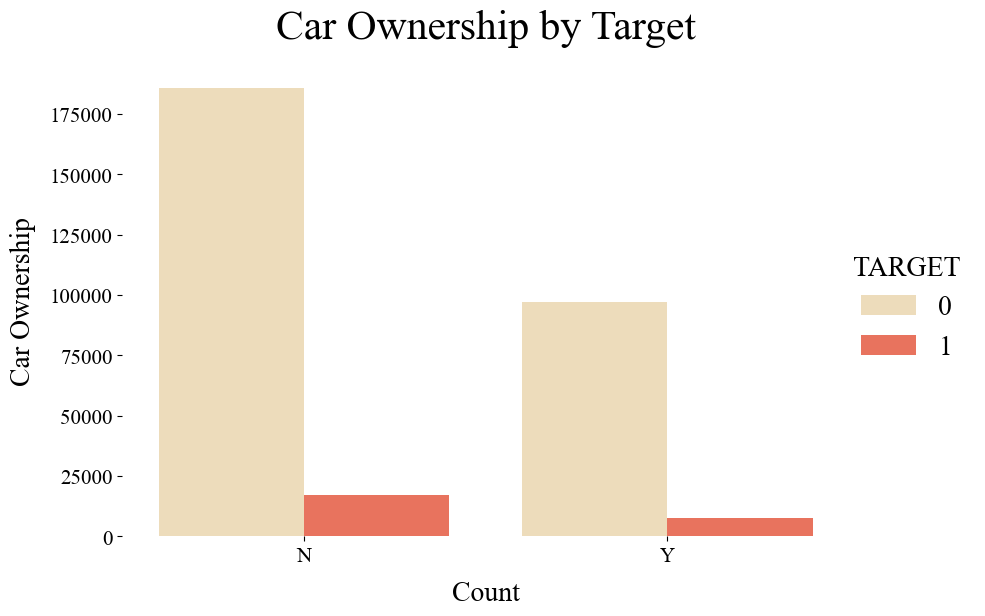

In [114]:
g = sns.catplot(data=train, x='FLAG_OWN_CAR', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Car Ownership by Target')
plt.xlabel('Count')
plt.ylabel('Car Ownership')

plt.show()

# **Realty Ownership**

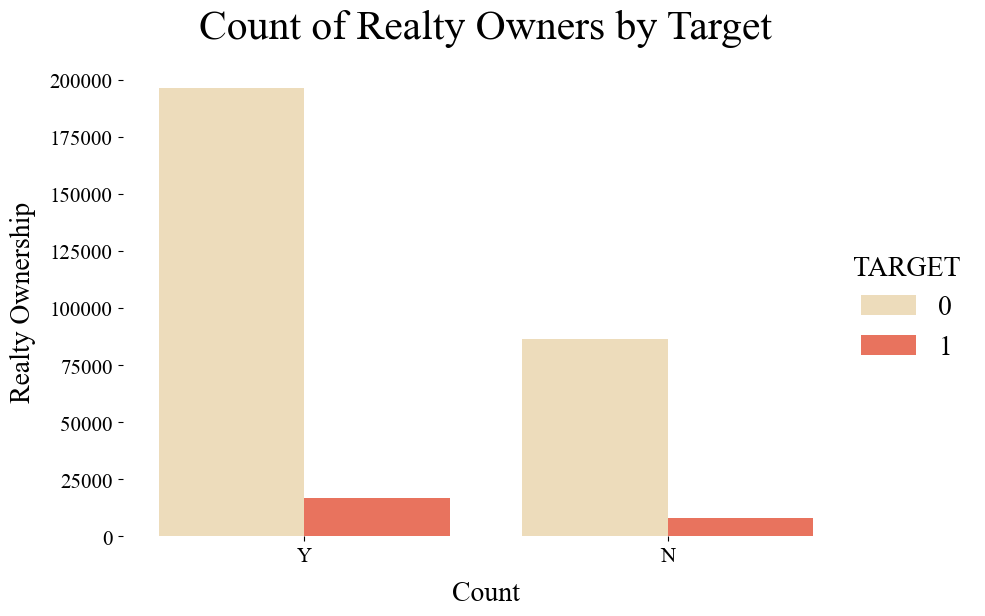

In [113]:
g = sns.catplot(data=train, x='FLAG_OWN_REALTY', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Realty Ownership by Target')
plt.xlabel('Count')
plt.ylabel('Realty Ownership')

plt.show()

## **Contract Type**

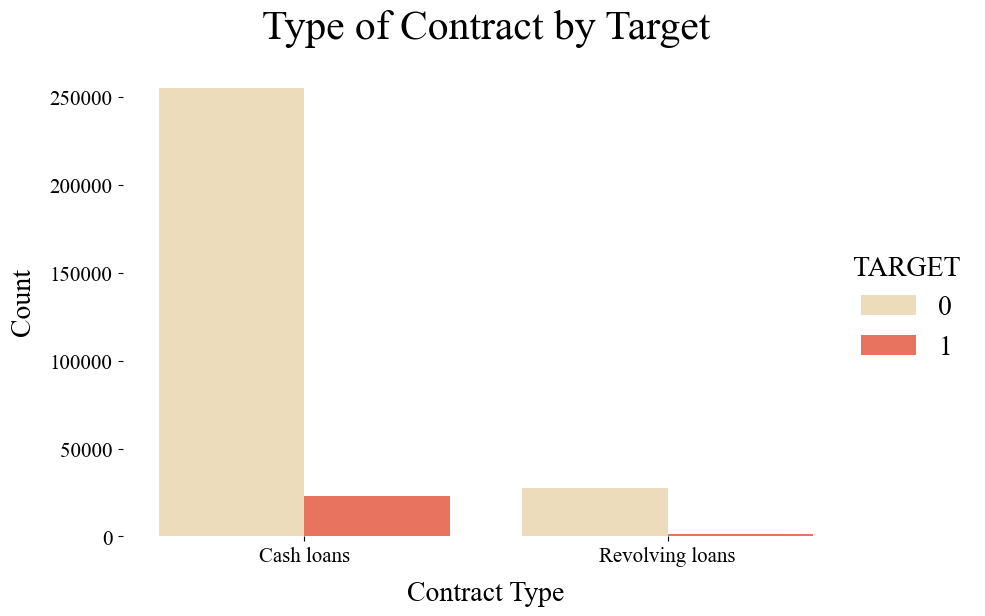

In [118]:
g = sns.catplot(data=train, x='NAME_CONTRACT_TYPE', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Type of Contract by Target')
plt.xlabel('Contract Type')
plt.ylabel('Count')

plt.show()

## **Eduction Type**

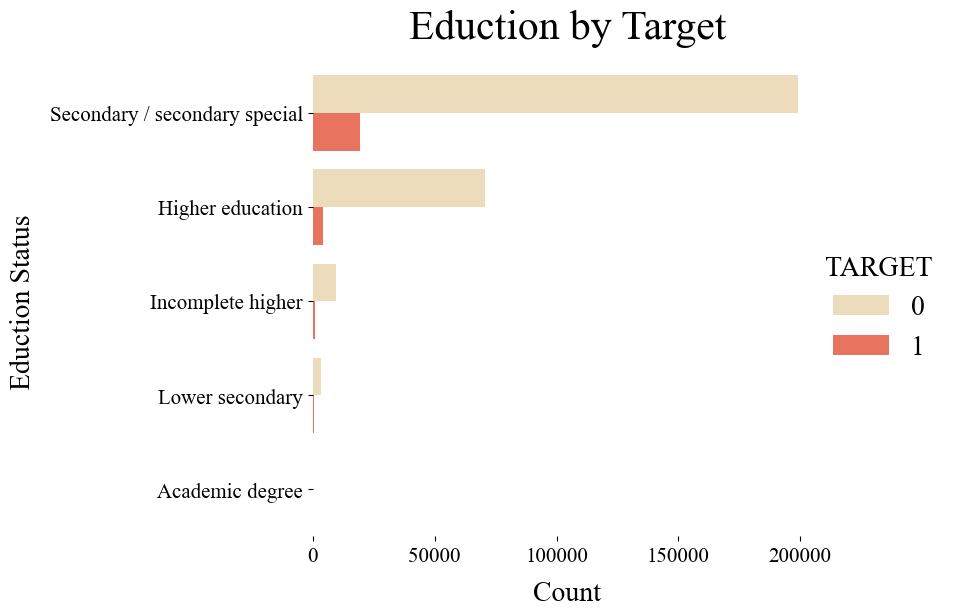

In [129]:
g = sns.catplot(data=train, y='NAME_EDUCATION_TYPE', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Eduction by Target')
plt.xlabel('Count')
plt.ylabel('Eduction Status')

plt.show()